# Legacy System Integration - Industrial Robotics 

## Ailton Dos Santos

### Calculated geometric parameters for legacy system integration in Industrial Roboto by:

- Making a graph of the robot when all joint angles are zero using the A matreces of tet=0

- Plotting the result, using the Px, Py and Pz given in TA1, TA12, TA123, TA1234, TA12345, TA123456

- Reachable working envelope

- Testing and calculating the T matrix using the theta values given
t1=0, t2=-40, t3=20, t4=45, t5=45, t6=60

- Making a graph of the robot position using the given theta angles

- Making the force varying with time

In [1]:
# Importing libraries and variables
import numpy as np
import math

In [2]:
S1=0.8
S2=0.06
S3=0.6
S4=0.3
S5=0.02
S6=0.05
tet=0

In [3]:
# Introducing DH parameters
DHparameters=[[270,0,S1,tet],[0,S3,S2,tet],[270,S5,0,tet],[90,0,S4,tet],[270,0,0,tet],[0,0,S6,tet]]

In [4]:
#Making calculations easier for A matrix, reducing repetitive parts
def sr(p):
    r=p*np.pi/180
    return r

In [5]:
# Creating A matrix
def A(p):
    X11=np.cos(sr(p[3]))
    X12=-np.sin(sr(p[3]))*np.cos(sr(p[0]))
    X13=np.sin(sr(p[3]))*np.sin(sr(p[0]))
    X14=p[1]*np.cos(sr(p[3]))
    X21=np.sin(sr(p[3]))
    X22=np.cos(sr(p[3]))*np.cos(sr(p[0]))
    X23=-np.cos(sr(p[3]))*np.sin(sr(p[0]))
    X24=p[1]*np.sin(sr(p[3]))
    X32=np.sin(sr(p[0]))
    X33=np.cos(sr(p[0]))
    X34=p[2]
    returns=[[X11,X12,X13,X14],[X21,X22,X23,X24],[0,X32,X33,X34],[0,0,0,1]]
    returns=np.matrix(returns)
    return returns

In [6]:
# Displaying A matrices with theta (tet) equal to 0
for Amatrices1 in DHparameters:
    amatres1=A(Amatrices1)
    print(amatres1, '\n')

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 1.   -0.    0.    0.6 ]
 [ 0.    1.   -0.    0.  ]
 [ 0.    0.    1.    0.06]
 [ 0.    0.    0.    1.  ]] 

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  2.0000000e-02]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 1.000000e+00 -0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  3.000000e-01]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]] 

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+

In [7]:
# Making a graph of the robot when all joint angles are zero 
# using the A matreces of tet=0
amat1 = [[1.0, 0.0, -0.0, 0.0], [0.0, -1.8369701987210297e-16, 1.0, 0.0], 
         [0, -1.0, -1.8369701987210297e-16, 0.8], [0, 0, 0, 1]]
amat2 = [[1.0, -0.0, 0.0, 0.6], [0.0, 1.0, -0.0, 0.0], [0, 0.0, 1.0, 0.06], [0, 0, 0, 1]]
amat3 = [[1.0, 0.0, -0.0, 0.02], [0.0, -1.8369701987210297e-16, 1.0, 0.0], 
         [0, -1.0, -1.8369701987210297e-16, 0], [0, 0, 0, 1]]
amat4 = [[1.0, -0.0, 0.0, 0.0], [0.0, 6.123233995736766e-17, -1.0, 0.0], 
         [0, 1.0, 6.123233995736766e-17, 0.3], [0, 0, 0, 1]] 
amat5 = [[1.0, 0.0, -0.0, 0.0], [0.0, -1.8369701987210297e-16, 1.0, 0.0], 
         [0, -1.0, -1.8369701987210297e-16, 0], [0, 0, 0, 1]] 
amat6 = [[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, -0.0, 0.0], [0, 0.0, 1.0, 0.05], [0, 0, 0, 1]]

In [8]:
# Multiplying sequentially the matrices to get Px,Py,Pz from them in order do make the plot
TA1 = np.matrix(amat1)
TA12 = np.matmul(amat1,amat2)
TA123 = np.matmul(TA12,amat3)
TA1234 = np.matmul(TA123,amat4)
TA12345 = np.matmul(TA1234,amat5)
TA123456 = np.matmul(TA12345,amat6)
print(TA1, '\n')
print(TA12, '\n')
print(TA123, '\n')
print(TA1234, '\n')
print(TA12345, '\n')
print(TA123456, '\n')

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  6.0000000e-01]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  6.0000000e-02]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  6.2000000e-01]
 [ 0.0000000e+00 -1.0000000e+00 -3.6739404e-16  6.0000000e-02]
 [ 0.0000000e+00  3.6739404e-16 -1.0000000e+00  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  6.2000000e-01]
 [ 0.0000000e+00 -4.2862638e-16  1.0000000e+00  6.0000000e-02]
 [ 0.0000000e+00 -1.0000000e+00 -4.2862638e-16  5.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00

In [9]:
# Plotting the result, using the Px, Py and Pz given in TA1, 
#TA12, TA123, TA1234, TA12345, TA123456
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
plt = Axes3D(fig)

<Figure size 640x480 with 0 Axes>

In [10]:
# The first value for X,Y and Z is equal to zero, because we are starting at the origin
x_vals = [0, 0, 0.6, 0.62, 0.62, 0.62, 0.62]
y_vals = [0, 0, 0.06, 0.06, 0.06, 0.06, 0.06]
z_vals = [0, 0.8, 0.8, 0.8, 0.5, 0.5, 0.45 ]

plt.plot(x_vals, y_vals, z_vals)
plt.set_xlabel('X')
plt.set_ylabel('Y')
plt.set_zlabel('Z')
plt.set_xlim(0,1.2)
plt.set_ylim(0,1.2) 
plt.set_zlim(0,1.2)
pyplot.show()

In [11]:
# Reachable working envelope
import numpy as np
import math
from matplotlib import pyplot as plt

envelope = []

def rotation_mat(degrees): # Defyning rotation matrix
    return np.matrix([[np.cos(np.deg2rad(degrees)), np.sin(np.deg2rad(degrees))], [-np.sin(np.deg2rad(degrees)), 
                                                                                   np.cos(np.deg2rad(degrees))]])

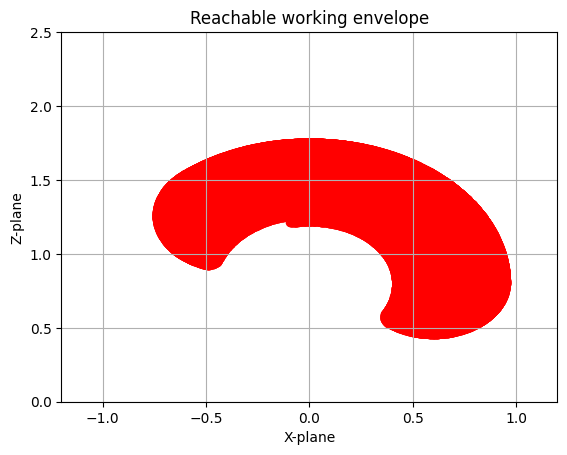

In [12]:
# Defyinig the links legth in meters
S1 = [[0, 0.8]]
S3 = [[0.6, 0]]
S4 = [[0, -0.3]]
S6 = [[0, -0.05]]

# atleast_2d = transforming to a vector
# zip() = takes iterables, makes iterator that aggregates elements based on the iterables passed.

#  -160 < theta 1 < 160, -130 < theta2 < 0, -210 < theta3 < 40, -150 < theta4 < 150, -100 < theta5 < 100, -180 < theta6 < 180  
for theta2 in range(-130, 1, 3): # The angle of theta2 starts from -130 till 0 in steps of 3
    Rot2 = rotation_mat(theta2) 
    S3rotation = Rot2 * np.atleast_2d(S3).T # Applying rotation to S3 link
    for theta3 in range(-210, 41, 3): # The angle of theta3 starts from -210 till 40, in steps of 3
        Rot3 = rotation_mat(theta3)
        S4rotation = Rot2 * Rot3 * np.atleast_2d(S4).T # Applying rotation to S4 link
        for theta5 in range(-100, 101, 3): # The angle of theta5 starts from -100 till 100 in steps of 3
            Rot5 = rotation_mat(theta5)
            S6rotation = Rot2 * Rot3 * Rot5 * np.atleast_2d(S6).T # Applying rotation to S6 link
            envelopepoint = np.atleast_2d(S1).T + S3rotation + S4rotation + S6rotation
            envelope.append(np.asarray(envelopepoint.T)[0])

envelopexs, envelopeys = zip(*envelope)

plt.scatter(envelopexs[1:], envelopeys[1:], color='r')
plt.xlim((-1.2, 1.2))
plt.ylim((0, 2.5))
plt.title("Reachable working envelope")
plt.xlabel('X-plane')
plt.ylabel('Z-plane')
plt.grid()
plt.show()

In [ ]:
# Calculating the T matrix using the theta values given
# t1=0, t2=-40, t3=20, t4=45, t5=45, t6=60
DHparameters=[[270,0,S1,0],[0,S3,S2,-40],[270,S5,0,20],[90,0,S4,45],[270,0,0,45],[0,0,S6,60]]
amat1=[]

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 0.76604444  0.64278761 -0.          0.45962667]
 [-0.64278761  0.76604444 -0.         -0.38567257]
 [ 0.          0.          1.          0.06      ]
 [ 0.          0.          0.          1.        ]] 

[[ 9.39692621e-01  6.28280811e-17 -3.42020143e-01  1.87938524e-02]
 [ 3.42020143e-01 -1.72618734e-16  9.39692621e-01  6.84040287e-03]
 [ 0.00000000e+00 -1.00000000e+00 -1.83697020e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

[[ 7.07106781e-01 -4.32978028e-17  7.07106781e-01  0.00000000e+00]
 [ 7.07106781e-01  4.32978028e-17 -7.07106781e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  6.12323400e-17  3.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]

In [ ]:
# Calculating first the A matrices using the given values for theta
for A1 in DHparameters:
    amat=A(A1)
    amat1.append(np.array(amat))
    print(amat, '\n')

In [ ]:
# Calculating the T matrix, multiplying the 6 A matrices from A1 to A6
for A in range(0,6):
    if A==0:
        tempo = amat1[A]
        continue
    else:
        tempo = np.matmul(tempo,amat1[A])
print(tempo)
# Result calculated in meters

[[-0.21959632 -0.94857406 -0.22800155  0.56962648]
 [-0.86237244  0.07945931  0.5         0.085     ]
 [-0.45617018  0.30642041 -0.8354731   0.86883153]
 [ 0.          0.          0.          1.        ]]


In [ ]:
# Making a graph of the robot position using the given theta angles
amat1 = [[1.0, 0.0, -0.0, 0.0], [0.0, -1.8369701987210297e-16, 1.0, 0.0], 
         [0, -1.0, -1.8369701987210297e-16, 0.8], [0, 0, 0, 1]] 
amat2 = [[0.766044443118978, 0.6427876096865393, -0.0, 0.4596266658713868], 
         [-0.6427876096865393, 0.766044443118978, -0.0, -0.38567256581192355], [0, 0.0, 1.0, 0.06], [0, 0, 0, 1]] 
amat3 = [[0.9396926207859084, 6.282808106515487e-17, -0.3420201433256687, 0.018793852415718168], 
         [0.3420201433256687, -1.7261873403417754e-16, 0.9396926207859084, 0.006840402866513375], 
         [0, -1.0, -1.8369701987210297e-16, 0], [0, 0, 0, 1]] 
amat4 = [[0.7071067811865476, -4.329780281177467e-17, 0.7071067811865476, 0.0], 
         [0.7071067811865476, 4.329780281177467e-17, -0.7071067811865476, 0.0], 
         [0, 1.0, 6.123233995736766e-17, 0.3], [0, 0, 0, 1]]
amat5 = [[0.7071067811865476, 1.29893408435324e-16, -0.7071067811865476, 0.0], 
         [0.7071067811865476, -1.29893408435324e-16, 0.7071067811865476, 0.0], 
         [0, -1.0, -1.8369701987210297e-16, 0], [0, 0, 0, 1]] 
amat6 = [[0.5000000000000001, -0.8660254037844386, 0.0, 0.0], [0.8660254037844386, 0.5000000000000001, -0.0, 0.0], 
         [0, 0.0, 1.0, 0.05], [0, 0, 0, 1]] 
# Multiplying sequentially the matrices to get Px,Py,Pz from them in order do make the plot
TA1 = np.matrix(amat1)
TA12 = np.matmul(amat1,amat2)
TA123 = np.matmul(TA12,amat3)
TA1234 = np.matmul(TA123,amat4)
TA12345 = np.matmul(TA1234,amat5)
TA123456 = np.matmul(TA12345,amat6)
print(TA1, '\n')
print(TA12, '\n')
print(TA123, '\n')
print(TA1234, '\n')
print(TA12345, '\n')
print(TA123456, '\n')

[[ 1.0000000e+00  0.0000000e+00 -0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8369702e-16  1.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.0000000e+00 -1.8369702e-16  8.0000000e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]] 

[[ 7.66044443e-01  6.42787610e-01  0.00000000e+00  4.59626666e-01]
 [ 1.18078168e-16 -1.40720081e-16  1.00000000e+00  6.00000000e-02]
 [ 6.42787610e-01 -7.66044443e-01 -1.83697020e-16  1.18567257e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

[[ 9.39692621e-01 -6.28280811e-17  3.42020143e-01  4.78420518e-01]
 [ 6.28280811e-17 -1.00000000e+00 -3.56315754e-16  6.00000000e-02]
 [ 3.42020143e-01  3.56315754e-16 -9.39692621e-01  1.19251297e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 

[[ 6.64463024e-01  3.42020143e-01  6.64463024e-01  5.81026561e-01]
 [-7.07106781e-01 -3.99613557e-16  7.07106781e-01  6.00000000e-02]
 [ 2.41844763e-01 -9.39692621e-01  2.41844763e-01  9.10605182e-01]
 [

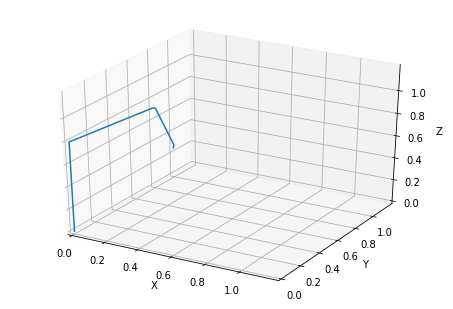

In [ ]:
# Plotting the result, using the Px, Py and Pz given in TA1, TA12, TA123, TA1234, TA12345, TA123456
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
plt = Axes3D(fig)

# The first value for X,Y and Z is equal to zero, because we are starting at the origin
x_vals = [0, 0, 0.459, 0.478, 0.58, 0.58, 0.56]
y_vals = [0, 0, 0.06, 0.06, 0.06, 0.06, 0.085]
z_vals = [0, 0.8, 1.185, 1.192, 0.91, 0.91, 0.868]

plt.plot(x_vals, y_vals, z_vals)
plt.set_xlabel('X')
plt.set_ylabel('Y')
plt.set_zlabel('Z')
plt.set_xlim(0,1.2)
plt.set_ylim(0,1.2) 
plt.set_zlim(0,1.2)
pyplot.show()

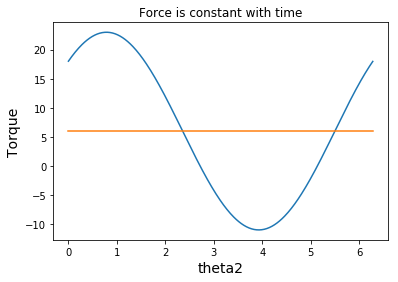

In [ ]:
# Assuming the force is constant with time
import numpy as np
import math
from matplotlib import pyplot as plt

theta1 = 0 # Assuming theta1 euqual to 0 (is held constant)
L2 = 3 # Assuming L2 equal to 3
L1 = 2*L2
fx = 2 # Assuming fx and fy equal to 2
fy = 2 
theta2 = np.linspace(0, 6.28, 360) # Making theta2 vary between 0 and 360 degrees
t1 = fx*L1*np.sin(theta2) + fy*(L2 + L1*np.cos(theta2)) # Multiplying the two matrices in Question 2(a) we get t1 and t2
t2 = np.full((360, 1), L2*fy) # Trasformed t2 in an array of 360 vales in order to plot it)

fig = plt.figure()
plt.plot(theta2, t1)  # Superimposed the two graphs, theta2 vs t1 and theta2 vs t2
plt.plot(theta2, t2)
plt.title("Force is constant with time")
plt.xlabel('theta2', fontsize=14)
plt.ylabel('Torque', fontsize=14)
show()
# The x axis is between 0 and 360 degrees (from 0 to 6 equally spaced, 60 degrees between each number)

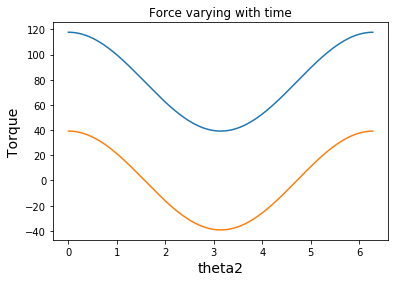

In [ ]:
# Making the force varying with time
import numpy as np
import math
from matplotlib import pyplot as plt

L2 = 4 # Assuming L2 equal to 4
L1 = 2*L2
theta2 = np.linspace(0, 6.28, 360) # Making theta2 vary between 0 and 360 degrees
theta1 = 3.14 # Assuming theta1 is constant at 3.14, 180 degrees
F = 9.81 # Gravitational force

# 4.71239 = 270 degrees in radians
theta3 = 4.71239 - theta1 -theta2 # # Theta3 has been calculated looking at Figure 3 on the coursework assignment document
fx = F*np.cos(theta3) # Colculating fx and fy using trigonometry and holding theta1 constant
fy = F*np.sin(theta3) 
t1 = fx*L1*np.sin(theta2) + fy*(L2 + L1*np.cos(theta2)) # Multiplying the two matrices in Question 2(a) we get t1 and t2.
t2 = L2*fy

fig = plt.figure()
plt.plot(theta2, t1)  # Superimposed the two graphs, theta2 vs t1 and theta2 vs t2
plt.plot(theta2, t2)
plt.title("Force varying with time")
plt.xlabel('theta2', fontsize=14)
plt.ylabel('Torque', fontsize=14)
show()
# The x axis is between 0 and 360 degrees (from 0 to 6 equally spaced, 60 degrees between each number)